# Getting started generating models with noddy

1. install pynoddy `pip install pynoddy`
1. grab a pre compined version of noddy https://github.com/flohorovicic/pynoddy/tree/master/noddyapp
1. make sure noddy is on your path (and maybe restart this notebook)
1. then run this script

right now we are just trying to explore how to use pynoddy / noddy to generate a model for our needs. best sources of inspiration are the pynoddy docs: http://pynoddy.readthedocs.io/en/latest/ and examples: https://github.com/flohorovicic/pynoddy/tree/master/examples

In [30]:
import os
history_file = './simple_two_faults_slice.his'
output_stub = 'simple'

print history_file

./simple_two_faults_slice.his


In [31]:
import subprocess
subprocess.call(['noddy', history_file, output_stub, 'BLOCK'])

1

this will create the block model files with .g\*\* extensions. .g01 is density. by modifying the `.his` file or post processing can we make a velocity cube?

(125000,)
[[ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 ..., 
 [ 3000.  3000.  3000. ...,  3000.  3000.  3000.]
 [ 3000.  3000.  3000. ...,  3000.  3000.  3000.]
 [ 3000.  3000.  3000. ...,  3000.  3000.  3000.]]


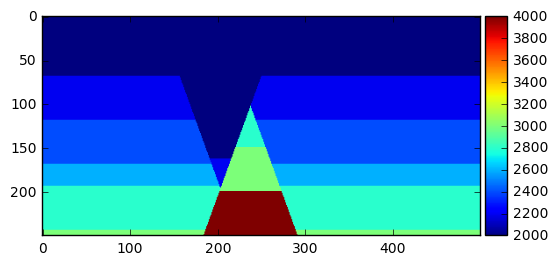

In [39]:
# load the first block file
import numpy as np

block_size = (250,500) # must match that in history file

model = np.genfromtxt("simple.g01", dtype=None)
print model.shape
model = model.reshape(block_size)
model.shape
print model

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(model)
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

In [49]:
from ieee2ibm import ieee2ibm

ieee2ibm_be = lambda x: ieee2ibm(x, True)
np_ieee2ibm_be = np.vectorize(ieee2ibm_be);
ibm_model_be = np_ieee2ibm_be(model)

with open('./simple.su', 'wb+') as f:
    f.write(ibm_model_be.tobytes())

todo
 - [x] generate a single slice model
 - [x] make it the right size
 - [ ] get variabiity into models using the pynoddy stochastics / . uncertainty gubbins
 - [ ] batch process -  makes 1000's
 - [ ] ascii to binary conversion script, to get the models into su
 - [x] visualise a model in a notebook